In [37]:
#ref: http://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
# Author: Robert Guthrie

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#torch.manual_seed(1)

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
#for monitoring
from time import time
#for parsing the data filename
import re

In [99]:
N = 100
a = np.linspace(0,1,N)
r = np.random.normal(0,0.3,N)
#a = a + r

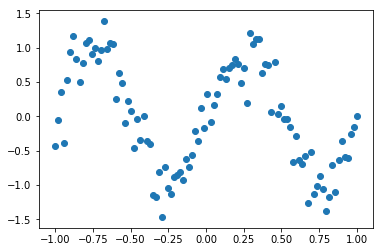

In [128]:
s = np.sin(2*np.pi*a) 
t = s+r

plt.scatter(a, t)
#plt.scatter(a, s)

In [240]:
#polynomial

def pol(x, w) :
    s = 0
    for i in range(len(w)) :
        s += w[i] * x**(i)
    return s

def error(f, x, t ) :
    return 0.5 * ( f(x)-t )**2

In [172]:
w = [0.31, 7.99, -25.43, 17.37]
a = np.linspace(0,1,N)
p = pol(a, w)

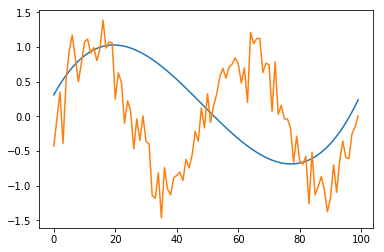

In [173]:
p = pol(a, w)
plt.plot(p)
plt.plot(t)

In [169]:
#w = [0.31, 7.99, -25.43, 17.37]
f = lambda x: pol(x,w)
np.sqrt( np.mean( error( f, a, t) ) )

1.262844662749286

In [248]:
def optim1( a, t, w ) :
    prev = 1000
    for _ in range(10000) :
        delta = np.random.normal(0,0.1,len(w))
        for i,d in enumerate(delta) :
            w[i] += d
            f = lambda x: pol(x,w)
            e = np.sqrt( np.mean( error( f, a, t) ) )
            if e > prev : #more error; we dont want this change
                w[i] -= d
            else : #new low error
                prev = e
    return w, prev


In [694]:
#w = np.array([ 7., 5., -4., 2.0, 3.0, 1.0, 0.2, 0.2, 9.0])
w = np.random.normal(-1,1,17)
#w, e = optim1( a, t, w)
#print(w,e)

In [673]:
np.dot(w,w)

28.559425057503553

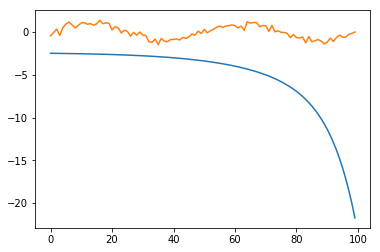

In [469]:
p = pol(a, w)
plt.plot(p)
plt.plot(t)

In [231]:
import autograd.numpy as np
from autograd import grad

In [697]:
f =  lambda w : np.sqrt( np.mean( error( lambda x: pol(x,w), a, t) ) ) 

In [698]:
grad_f = grad( f )

In [653]:
g = f(w)

In [654]:
g

0.5132364773848348

In [279]:
delta = grad_f(w)
delta

array([-1.08945765e-04,  2.71457958e-05, -6.65663209e-05])

In [280]:
w -= delta

In [556]:
class sgd :
    def __init__(self, learning_rate ) :
        self.learning_rate = learning_rate
        
    def update(self, w, delta) :
        w += -1 * self.learning_rate*delta
        return w

class momentum :
    def __init__(self, learning_rate, momentum ) :
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.v = None
        
    def update(self, w, delta) :
        if self.v is None :
            self.v = np.empty_like(w)
        
        self.v = self.v * self.momentum - self.learning_rate * delta        
        w += self.v
        
        return w

In [765]:
np.random.seed(4)
w = np.random.normal(-1,0.01,17) * 0.001

In [766]:
w

array([-0.00099949, -0.000995  , -0.00100996, -0.00099306, -0.00100418,
       -0.00101585, -0.00100648, -0.00099401, -0.00099668, -0.00101147,
       -0.00099381, -0.00100088, -0.00099575, -0.00099668, -0.00101157,
       -0.00099649, -0.00100607])

In [767]:
rule = sgd(0.6)
rule = momentum( 0.9, 0.99)

In [768]:

for K in [1000, 1000, 1000, 10000, 10000, 10000 ] :
    loss = []
    for _ in range(K) :
        g = f(w)
        loss.append(g)
        delta = grad_f(w)
        w =rule.update(w,delta)
    print( loss[0], loss[-1])

0.5271532784086638 0.32615674569835323
0.32609262329241673 0.27192625133907966
0.27188405956028594 0.24081909993822015
0.24079786444142756 0.21639554440752282
0.21639554441264422 0.21639556543646818
0.2163955654373375 0.2163955705680064


In [710]:
"""
np.random.seed(1)
w = np.random.normal(-1,1,17)

rule = momentum( 0.6, 0.9)
3.5560044424229647 0.38713944605035683
0.38713392217939196 0.3817271065295878
0.381721752886955 0.3764212832276155
0.37641602366331306 0.32817993375895177
0.3281755641932573 0.2895150943506999
0.2895117468454209 0.26125736567204816

rule = momentum( 0.6, 0.99)
3.5560044424229647 0.4863051942616188
0.6575828033120948 0.6665605225295627
0.4575701644571313 0.4523220008351101
0.4683039458979606 0.4528868583850111
0.6966296645718731 0.6985124323359448
0.43841487777714155 0.43790428985952223

rule = momentum( 0.6, 0.8)
3.5560044424229647 0.39079816132392736
0.3907902142428287 0.387019630347091
0.38701686627409365 0.38429743912890163
0.38429473743198217 0.3584319156504641
0.3584294367268531 0.33474476171906153
0.3347425067746032 0.3134020044704315

rule = momentum( 0.9, 0.8) #lr change
3.5560044424229647 0.3884880291606524
0.38848327419698175 0.38431935049300475
0.38431529762474814 0.38029584993886856
0.38029185452926373 0.34279797916362703
0.342794475192631 0.3104301256076458
0.3104271666836275 0.28376647980087893

rule = momentum( 0.9, 0.9)
3.5560044424229647 0.3844968628445195
0.38448875147609146 0.3764989690383505
0.3764910775048043 0.36870574313192
0.3686980465853425 0.3019284716570442
0.30192289637352493 0.25791547099975853
0.25791220629818007 0.23450499587505297  <++

rule = momentum( 0.9, 0.99)
3.5560044424229647 0.42927862632808117
0.43288233339429566 0.4305152069884807
0.43498617614597307 0.4305686174210966
0.4349649346294044 0.43059778446407926
0.4349485338590576 0.4305986002011213
0.4349489599668189 0.4305991462458314
"""
;

''

In [ ]:
"""
np.random.seed(2)              <++ change of random seed
w = np.random.normal(-1,1,17)

rule = momentum( 0.6, 0.99)
0.5203791785973844 0.34759738769901893
0.34754767819545873 0.3042781760164694
0.3042398788658247 0.2712961618919578
0.2712685167331353 0.21164281448572267
0.21164174912788553 0.20256392297932996
0.20256314695517041 0.19593161275941176  <+++ best

rule = momentum( 0.9, 0.8)
4.621891076778259 0.38612101225476825
0.38611630540500413 0.3819748038303994
0.381970770117659 0.3779714559011497
0.37796748153468557 0.3407237744883898
0.3407202981995466 0.30865295040367463
0.3086500229212705 0.2823130440314461

rule = momentum( 0.9, 0.9)
4.621891076778259 0.38219432680521004
0.38218625208348184 0.3742369472455544
0.37422909921532094 0.3664891399783056
0.3664814904673737 0.30027454453567964
0.30026903231525365 0.2568892684646167
0.25688606185084095 0.23394916128290286


rule = momentum( 0.9, 0.99)
4.621891076778259 0.33735626365236043
0.3373252432720243 0.27916132198786003
0.2791150775496254 0.2444514823972855
0.24442731674139667 0.21639554392196028
0.21639554392721044 0.21639556535657353
0.216395565357449 0.21639557053923347    <+
"""

In [ ]:
plt.plot(loss)

In [692]:
loss[0], loss[-1]

(0.20260548911647022, 0.19596276571209845)

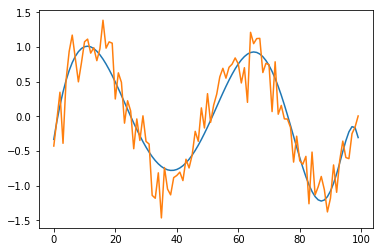

In [752]:
p = pol(a, w)
plt.plot(p)
plt.plot(t)

In [629]:
w

array([  -0.25786954,   24.86261087, -146.60771175,  198.65775112,
         65.34860609,  -78.69126123, -114.14068519,  -71.90123875,
         -8.93139678,   40.17993129,   60.3708854 ,   56.81863927,
         37.97966807,   13.49821169,  -11.64287351,  -29.53317011,
        -36.38359895])

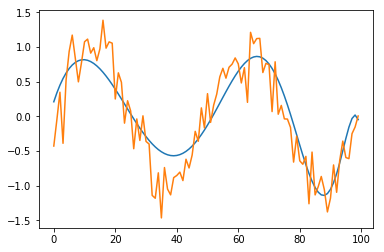

In [448]:
p = pol(a, w)
plt.plot(p)
plt.plot(t)

In [449]:
w

array([  0.21051765,  13.578851  , -86.20910111, 106.37335018,
        56.57391381, -27.3623796 , -68.06179161, -60.09454539,
       -32.05319715,   1.40890237,  32.13689806,  45.09945017,
        45.1722131 ,  37.5955436 ,  13.70253166, -18.70219892,
       -59.4160743 ])

In [ ]:
loss = []
d1 = []
for _ in range(10000) :
    g = f(w)
    loss.append(g)
    delta = grad_f(w)
    d1.append(delta)
    w =rule.update(w,delta)
d1 = np.array(d1)